In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# # Live Data Generation

# np.random.seed(15)

# # Number of transactions
# n_samples = 100
# fraud_ratio = 0.15
# n_fraud = int(n_samples * fraud_ratio)
# n_legit = n_samples - n_fraud

# # ---------------------------
# # Legitimate transactions
# # ---------------------------
# legit = pd.DataFrame({
#     "transaction_id": np.arange(n_legit),
#     "timestamp": pd.date_range("2024-01-01", periods=n_legit, freq="min"),
#     "amount": np.random.gamma(2.0, 50.0, n_legit),
#     "currency": np.random.choice(["INR","USD","EUR"], n_legit, p=[0.7,0.2,0.1]),
#     "merchant_category": np.random.choice(["Groceries","Electronics","Travel","Restaurants","Fashion"], n_legit),
#     "merchant_id": np.random.randint(1000,2000,n_legit),
#     "customer_id": np.random.randint(1,5000,n_legit),
#     "card_present": np.random.choice([0,1], n_legit, p=[0.3,0.7]),
#     "device_id": np.random.randint(10000,20000,n_legit),
#     "location": np.random.choice(["Delhi","Mumbai","Bangalore","London","New York"], n_legit, p=[0.5,0.2,0.2,0.05,0.05]),
#     "is_international": np.random.choice([0,1], n_legit, p=[0.9,0.1]),
#     "failed_login_attempts": np.random.poisson(0.2, n_legit),
#     "velocity": np.random.poisson(1.0, n_legit),
#     "ip_risk_score": np.random.normal(0.2,0.1,n_legit).clip(0,1),
#     "transaction_type": np.random.choice(["POS","Online","ATM"], n_legit, p=[0.6,0.3,0.1]),
#     "channel": np.random.choice(["Web","Mobile","InStore"], n_legit, p=[0.4,0.4,0.2]),
#     "customer_age": np.random.randint(18,70,n_legit),
#     "account_tenure": np.random.randint(1,15,n_legit),  # years
#     "geo_distance": np.random.exponential(5.0,n_legit), # km
#     "merchant_risk_score": np.random.normal(0.3,0.1,n_legit).clip(0,1),
#     "fraud_flag": 0
# })

# # ---------------------------
# # Fraud transactions
# # ---------------------------
# fraud = pd.DataFrame({
#     "transaction_id": np.arange(n_legit, n_legit+n_fraud),
#     "timestamp": pd.date_range("2024-06-01", periods=n_fraud, freq="min"),
#     "amount": np.random.gamma(5.0, 200.0, n_fraud),
#     "currency": np.random.choice(["INR","USD","EUR"], n_fraud, p=[0.4,0.4,0.2]),
#     "merchant_category": np.random.choice(["Electronics","Travel","Luxury","Gaming"], n_fraud),
#     "merchant_id": np.random.randint(2000,3000,n_fraud),
#     "customer_id": np.random.randint(1,5000,n_fraud),
#     "card_present": np.random.choice([0,1], n_fraud, p=[0.1,0.9]),
#     "device_id": np.random.randint(20000,30000,n_fraud),
#     "location": np.random.choice(["Delhi","Mumbai","Bangalore","London","New York","Dubai"], n_fraud, p=[0.2,0.1,0.1,0.2,0.2,0.2]),
#     "is_international": np.random.choice([0,1], n_fraud, p=[0.3,0.7]),
#     "failed_login_attempts": np.random.poisson(2.0, n_fraud),
#     "velocity": np.random.poisson(5.0, n_fraud),
#     "ip_risk_score": np.random.normal(0.7,0.15,n_fraud).clip(0,1),
#     "transaction_type": np.random.choice(["POS","Online","ATM"], n_fraud, p=[0.2,0.7,0.1]),
#     "channel": np.random.choice(["Web","Mobile","InStore"], n_fraud, p=[0.6,0.3,0.1]),
#     "customer_age": np.random.randint(18,70,n_fraud),
#     "account_tenure": np.random.randint(1,15,n_fraud),
#     "geo_distance": np.random.exponential(50.0,n_fraud), # much larger distances
#     "merchant_risk_score": np.random.normal(0.8,0.1,n_fraud).clip(0,1),
#     "fraud_flag": 1
# })

# # ---------------------------
# # Combine and shuffle
# # ---------------------------
# df = pd.concat([legit, fraud], ignore_index=True)
# df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# # ---------------------------
# # Inject anomalies
# # ---------------------------
# # Missing values
# mask = np.random.rand(len(df)) < 0.01
# df.loc[mask, "device_id"] = np.nan

# # Typos in merchant_category
# typo_idx = np.random.choice(df.index, size=20, replace=False)
# df.loc[typo_idx, "merchant_category"] = "Groceires"

# # Extreme outliers
# outlier_idx = np.random.choice(df.index, size=5, replace=False)
# df.loc[outlier_idx, "amount"] = df.loc[outlier_idx, "amount"] * 100

# # Save to CSV
# df.to_csv("../data/live/live_fraud_transactions.csv", index=False)

# print("Dataset shape:", df.shape)
# print("Fraud ratio:", df['fraud_flag'].mean())
# print(df.head())

Dataset shape: (100, 21)
Fraud ratio: 0.15
   transaction_id           timestamp      amount currency merchant_category  \
0              83 2024-01-01 01:23:00  120.155740      INR       Restaurants   
1              53 2024-01-01 00:53:00   76.562524      INR         Groceires   
2              70 2024-01-01 01:10:00  195.303883      INR         Groceries   
3              45 2024-01-01 00:45:00   86.491774      INR       Electronics   
4              44 2024-01-01 00:44:00  103.134675      USD       Restaurants   

   merchant_id  customer_id  card_present  device_id   location  ...  \
0         1406         1936             0    17623.0     London  ...   
1         1409          610             0    15225.0  Bangalore  ...   
2         1913         4697             1    15518.0      Delhi  ...   
3         1941         1650             1    18908.0      Delhi  ...   
4         1807          545             0    16711.0     Mumbai  ...   

   failed_login_attempts  velocity  ip_risk

In [47]:
df = pd.read_csv("../data/raw/fraud_transactions.csv")
df.head()

,transaction_id,timestamp,amount,currency,merchant_category,merchant_id,customer_id,card_present,device_id,location,...,failed_login_attempts,velocity,ip_risk_score,transaction_type,channel,customer_age,account_tenure,geo_distance,merchant_risk_score,fraud_flag
0,75721,2/22/2024 14:01,16.897040,INR,Groceries,1028,175,1,15895.0,Delhi,...,0,1,0.192316,POS,InStore,65,4,4.915788,0.053996,0
1,80184,2/25/2024 16:24,47.266909,INR,Electronics,1686,1106,1,14365.0,Bangalore,...,0,0,0.071644,POS,Mobile,55,4,1.855198,0.275165,0
2,19864,1/14/2024 19:04,29.994374,INR,Travel,1400,4254,1,13595.0,New York,...,0,2,0.334914,POS,InStore,28,4,9.300444,0.283463,0
3,76699,2/23/2024 6:19,97.064867,INR,Electronics,1073,3825,1,14819.0,Mumbai,...,0,2,0.047129,ATM,InStore,31,10,1.254719,0.292656,0
4,92991,3/5/2024 13:51,39.703084,USD,Fashion,1242,1054,1,14065.0,Delhi,...,1,0,0.302726,POS,Mobile,36,14,6.067670,0.171992,0


In [48]:
df.drop(columns=["transaction_id","timestamp"], inplace=True)


In [49]:
df["merchant_id"].nunique()

1548

In [50]:
print("Dataset shape:", df.shape)
print("Fraud ratio:", df['fraud_flag'].mean()*100, "%")
print("Columns:", df.columns.tolist())
print(df.info())

Dataset shape: (100000, 19)
Fraud ratio: 1.008 %
Columns: ['amount', 'currency', 'merchant_category', 'merchant_id', 'customer_id', 'card_present', 'device_id', 'location', 'is_international', 'failed_login_attempts', 'velocity', 'ip_risk_score', 'transaction_type', 'channel', 'customer_age', 'account_tenure', 'geo_distance', 'merchant_risk_score', 'fraud_flag']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   amount                 100000 non-null  float64
 1   currency               100000 non-null  object 
 2   merchant_category      100000 non-null  object 
 3   merchant_id            100000 non-null  int64  
 4   customer_id            100000 non-null  int64  
 5   card_present           100000 non-null  int64  
 6   device_id              98996 non-null   float64
 7   location               100000 non-null  obj

In [51]:
df.describe(include='all').round(2)

,amount,currency,merchant_category,merchant_id,customer_id,card_present,device_id,location,is_international,failed_login_attempts,velocity,ip_risk_score,transaction_type,channel,customer_age,account_tenure,geo_distance,merchant_risk_score,fraud_flag
count,100000.00,100000,100000,100000.00,100000.00,100000.00,98996.00,100000,100000.00,100000.00,100000.00,100000.00,100000,100000,100000.00,100000.00,100000.00,100000.00,100000.00
unique,NaN,3,8,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,INR,Travel,NaN,NaN,NaN,NaN,Delhi,NaN,NaN,NaN,NaN,POS,Web,NaN,NaN,NaN,NaN,NaN
freq,NaN,69834,19948,NaN,NaN,NaN,NaN,49814,NaN,NaN,NaN,NaN,59927,40209,NaN,NaN,NaN,NaN,NaN
mean,113.70,NaN,NaN,1506.81,2500.18,0.70,15086.98,NaN,0.11,0.22,1.03,0.20,NaN,NaN,43.44,7.49,5.36,0.30,0.01
std,366.19,NaN,NaN,302.52,1438.66,0.46,3019.15,NaN,0.31,0.49,1.07,0.11,NaN,NaN,15.01,4.02,7.99,0.11,0.10
min,0.21,NaN,NaN,1000.00,1.00,0.00,10000.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,18.00,1.00,0.00,0.00,0.00
25%,48.40,NaN,NaN,1251.00,1261.00,0.00,12527.00,NaN,0.00,0.00,0.00,0.13,NaN,NaN,30.00,4.00,1.43,0.23,0.00
50%,84.80,NaN,NaN,1502.00,2495.00,1.00,15064.50,NaN,0.00,0.00,1.00,0.20,NaN,NaN,43.00,8.00,3.48,0.30,0.00
75%,136.54,NaN,NaN,1755.00,3744.00,1.00,17560.25,NaN,0.00,0.00,2.00,0.27,NaN,NaN,56.00,11.00,6.98,0.37,0.00


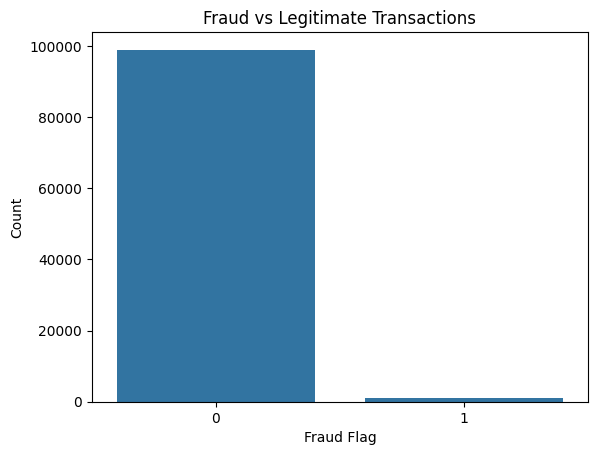

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='fraud_flag', data=df)
plt.title("Fraud vs Legitimate Transactions")
plt.xlabel("Fraud Flag")
plt.ylabel("Count")
plt.show()

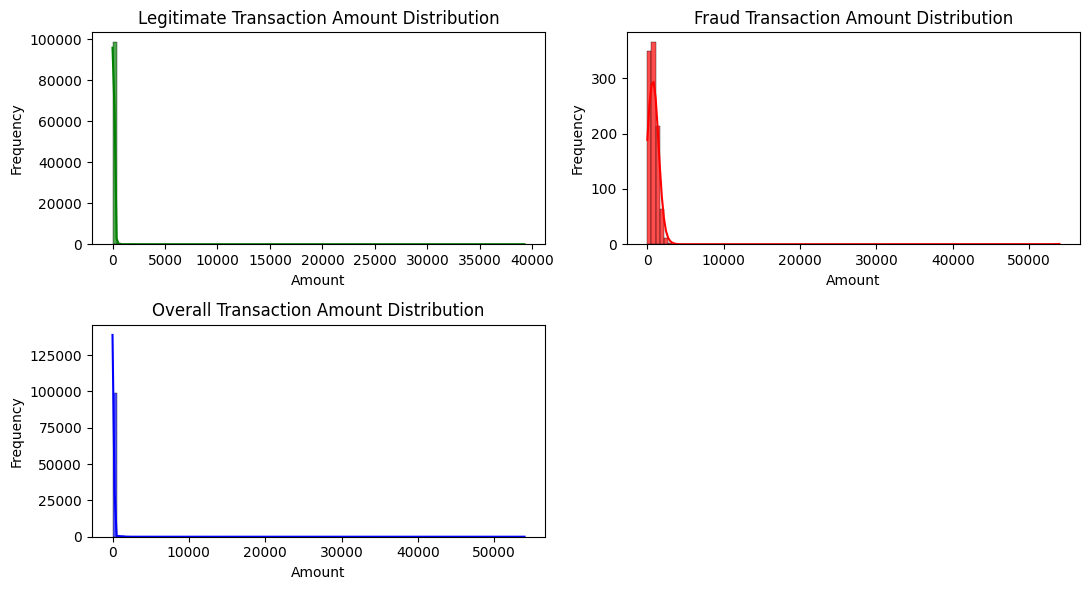

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(11,6))
sns.histplot(df[df['fraud_flag']==0]['amount'], bins=100, kde=True, color='green', alpha=0.7, ax=ax[0,0])
ax[0,0].set_title("Legitimate Transaction Amount Distribution")
ax[0,0].set_xlabel("Amount")
ax[0,0].set_ylabel("Frequency")

sns.histplot(df[df['fraud_flag']==1]['amount'], bins=100, kde=True, color='red', alpha=0.7, ax=ax[0,1])
ax[0,1].set_title("Fraud Transaction Amount Distribution")
ax[0,1].set_xlabel("Amount")
ax[0,1].set_ylabel("Frequency")

sns.histplot(df['amount'], bins=100, kde=True, color='blue', alpha=0.7, ax=ax[1,0])
ax[1,0].set_title("Overall Transaction Amount Distribution")
ax[1,0].set_xlabel("Amount")
ax[1,0].set_ylabel("Frequency")

fig.delaxes(ax[1,1])

plt.tight_layout()
plt.show()

As we can see the data is highly right skewed

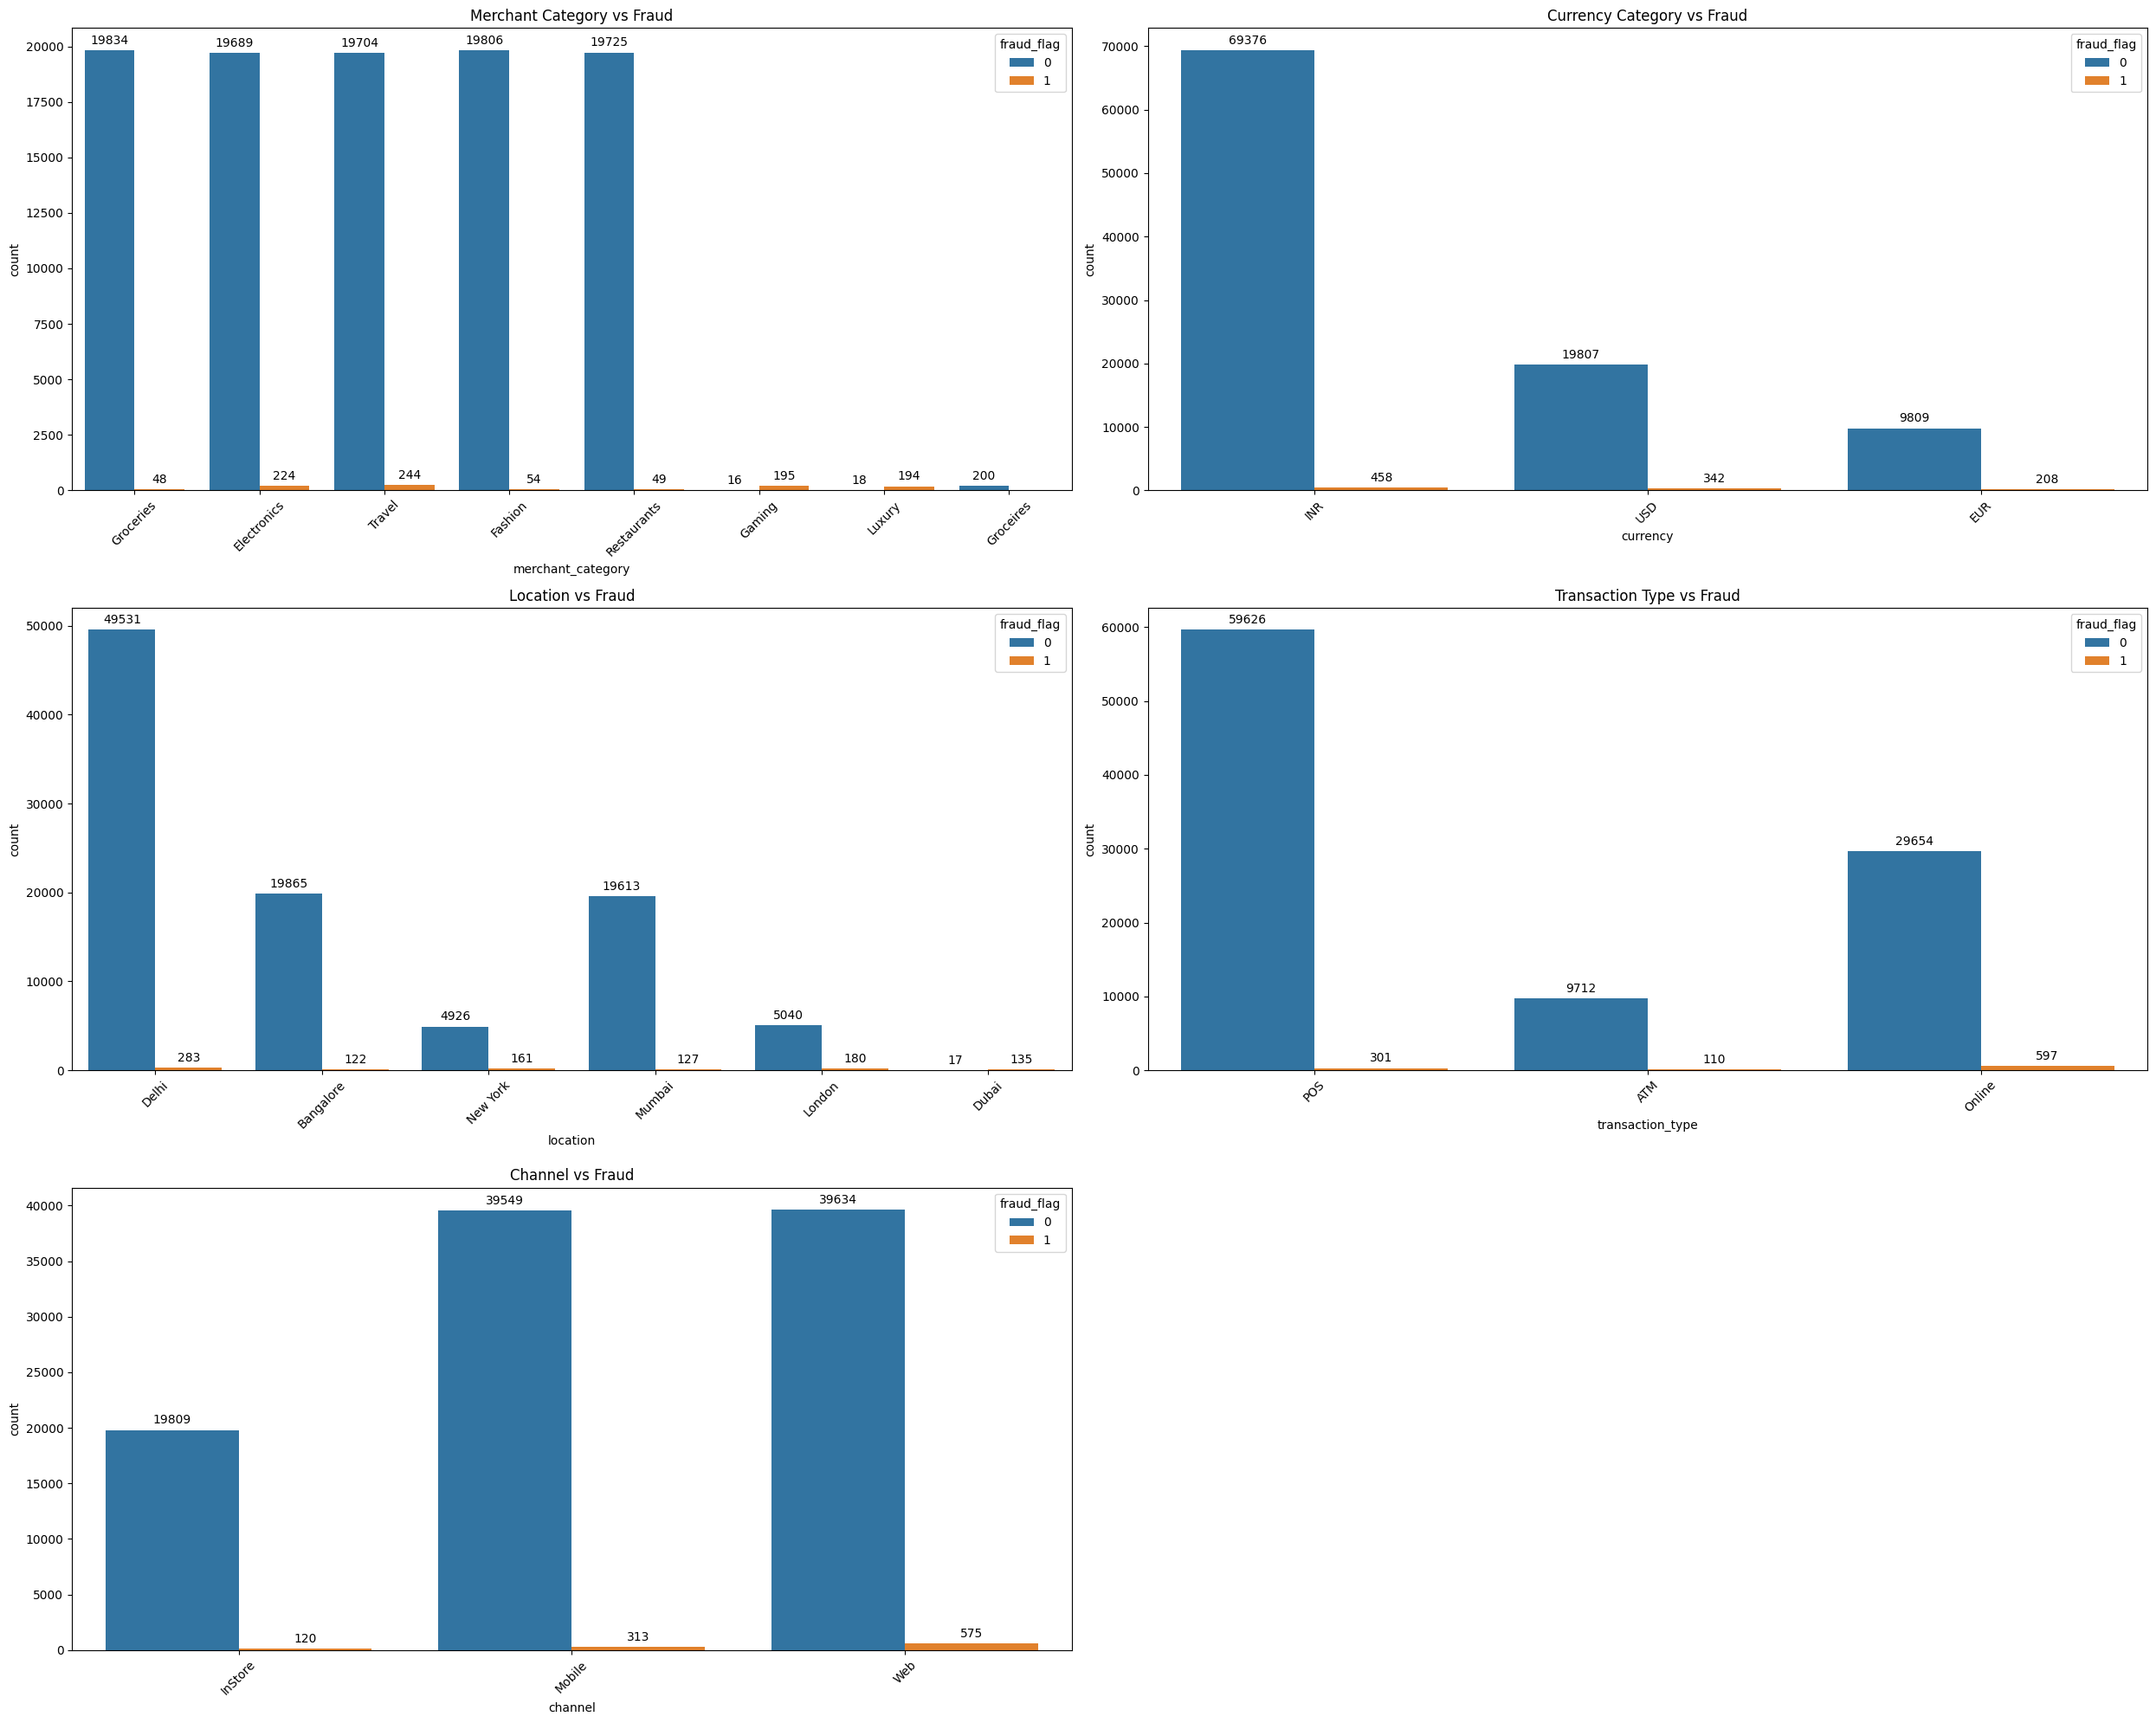

In [54]:
# Categorical Feature Analysis

fig, ax= plt.subplots(3, 2, figsize=(25,20))

# Merchant Category vs Fraud
ax[0,0] = sns.countplot(x="merchant_category", hue="fraud_flag", data=df, ax=ax[0,0])
ax[0,0].set_title("Merchant Category vs Fraud")
ax[0,0].tick_params(axis='x', rotation=45)
for container in ax[0,0].containers:
    ax[0,0].bar_label(container, fmt='%d', padding=3)

# Currency Category vs Fraud
ax[0,1] = sns.countplot(x="currency", hue="fraud_flag", data=df, ax=ax[0,1])
ax[0,1].set_title("Currency Category vs Fraud")
ax[0,1].tick_params(axis='x', rotation=45)
for container in ax[0,1].containers:
    ax[0,1].bar_label(container, fmt='%d', padding=3)

# location vs Fraud
ax[1,0] = sns.countplot(x="location", hue="fraud_flag", data=df, ax=ax[1,0])
ax[1,0].set_title("Location vs Fraud")
ax[1,0].tick_params(axis='x', rotation=45)
for container in ax[1,0].containers:
    ax[1,0].bar_label(container, fmt='%d', padding=3)

# transaction_type vs Fraud
ax[1,1] = sns.countplot(x="transaction_type", hue="fraud_flag", data=df, ax=ax[1,1])
ax[1,1].set_title("Transaction Type vs Fraud")
ax[1,1].tick_params(axis='x', rotation=45)
for container in ax[1,1].containers:
    ax[1,1].bar_label(container, fmt='%d', padding=3)

# channel vs Fraud
ax[2,0] = sns.countplot(x="channel", hue="fraud_flag", data=df, ax=ax[2,0])
ax[2,0].set_title("Channel vs Fraud")
ax[2,0].tick_params(axis='x', rotation=45)
for container in ax[2,0].containers:
    ax[2,0].bar_label(container, fmt='%d', padding=3)

fig.delaxes(ax[2,1])
plt.tight_layout()
plt.show()

We can notice that merchant categories 'Gaming' and 'Luxury' are highly likely to be fraud. Also there is a typo 'Groceires'

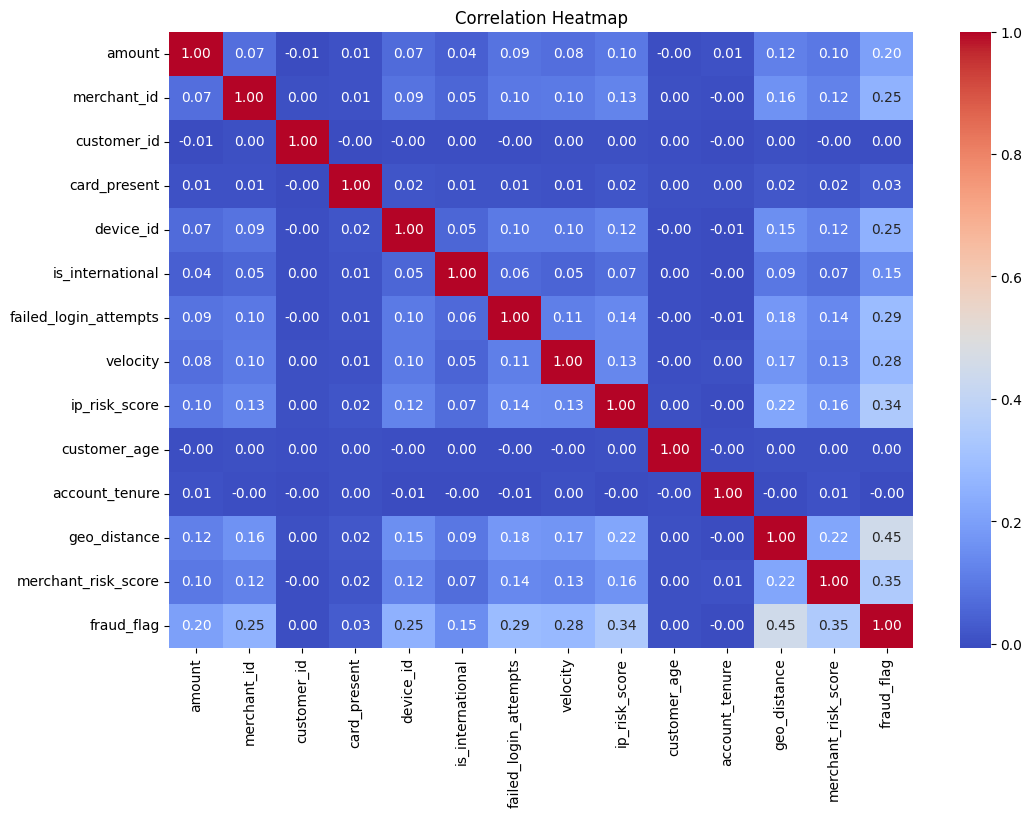

In [55]:
# Numerical Feature Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Visually no multicollinearity found in independent features

In [56]:
# Checking for missing values

df.isnull().sum().sort_values(ascending=False)

device_id                1004
currency                    0
amount                      0
merchant_category           0
merchant_id                 0
customer_id                 0
card_present                0
location                    0
is_international            0
failed_login_attempts       0
velocity                    0
ip_risk_score               0
transaction_type            0
channel                     0
customer_age                0
account_tenure              0
geo_distance                0
merchant_risk_score         0
fraud_flag                  0
dtype: int64

In [57]:
# Check typos in categorical columns

for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].unique()} \n")

Unique values in 'currency': ['INR' 'USD' 'EUR'] 

Unique values in 'merchant_category': ['Groceries' 'Electronics' 'Travel' 'Fashion' 'Restaurants' 'Gaming'
 'Luxury' 'Groceires'] 

Unique values in 'location': ['Delhi' 'Bangalore' 'New York' 'Mumbai' 'London' 'Dubai'] 

Unique values in 'transaction_type': ['POS' 'ATM' 'Online'] 

Unique values in 'channel': ['InStore' 'Mobile' 'Web'] 



Again, we can see 'Groceires' is a typo in 'merchant_category'

Number of outliers in amount: 3745
Number of outliers in merchant_id: 424
Number of outliers in customer_id: 0
Number of outliers in card_present: 0
Number of outliers in device_id: 390
Number of outliers in is_international: 10538
Number of outliers in failed_login_attempts: 18723
Number of outliers in velocity: 358
Number of outliers in ip_risk_score: 1036
Number of outliers in customer_age: 0
Number of outliers in account_tenure: 0
Number of outliers in geo_distance: 5233
Number of outliers in merchant_risk_score: 1429


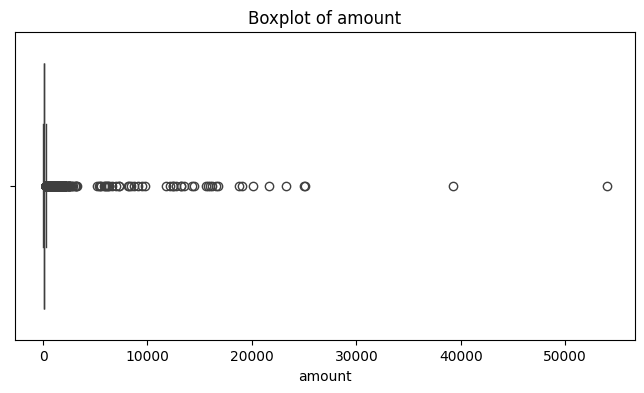

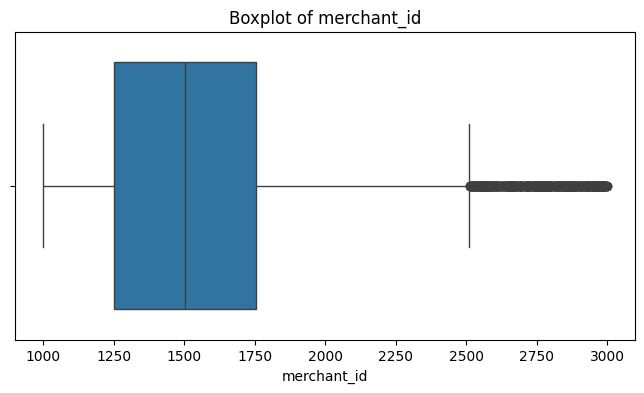

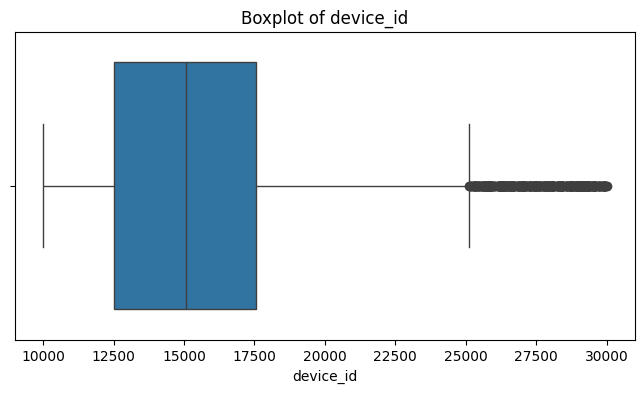

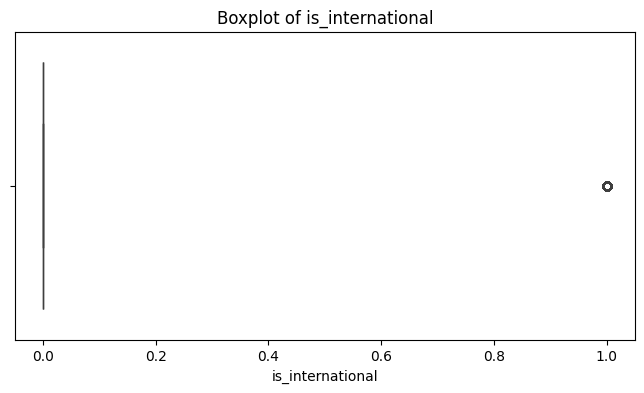

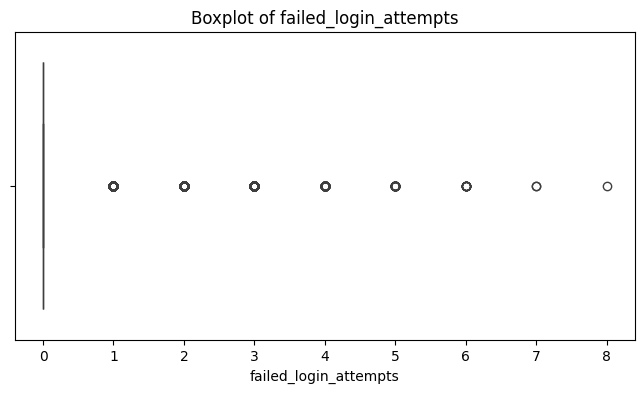

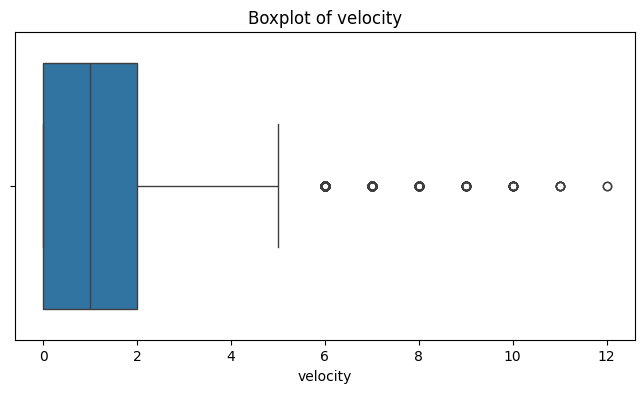

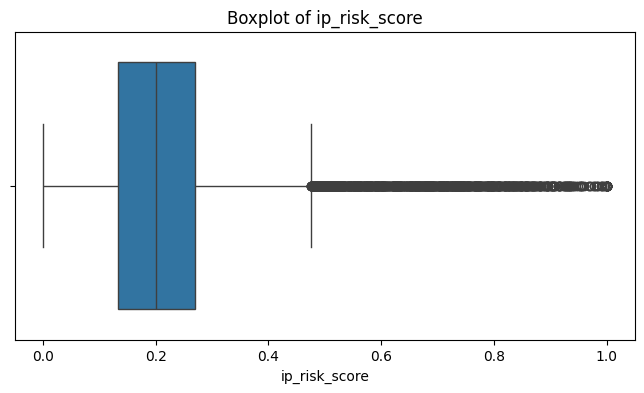

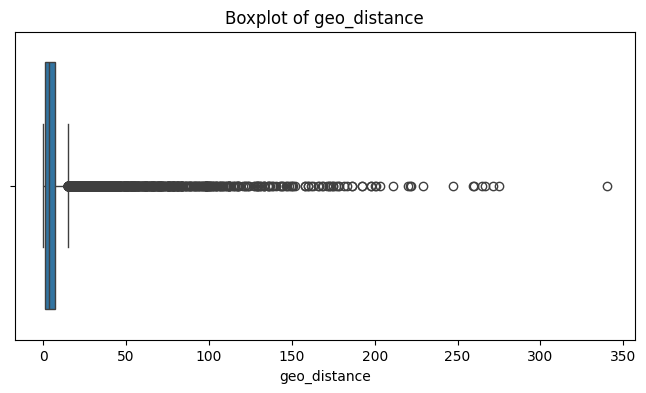

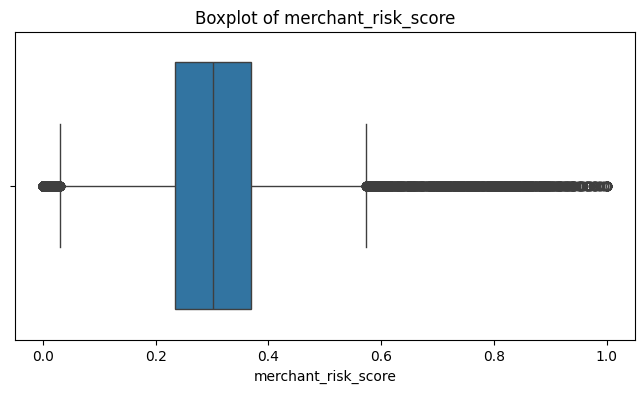

In [58]:
# Outlier Detection in all numerical features

for col in df.select_dtypes(include=['float64','int64']).columns[0:-1]:  # Exclude fraud_flag
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"Number of outliers in {col}: {len(outliers)}")

# Visualizing outliers found above

for col in df.select_dtypes(include=['float64','int64']).columns[0:-1]:  # Exclude fraud_flag
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if len(outliers) == 0:
        continue
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()